# Bike Sharing System 

## Business Problem

**Context**

Bike sharing systems are a recent evolution of traditional bike rental systems, where the entire process - from membership to rental to return - is automatic. Nowadays, there is a great interest in these schemes as they play an important role in transportation, environment and health. Apart from the interesting real-world applications of bike-sharing systems, the characteristics of the data generated by these systems make them interesting for research.

**Problem Statement**

One of the biggest challenges for the company to optimize the bike sharing system is to have enough bikes for the customers. If the number of bicycles is insufficient, it will have an impact on profit loss for the company and affect the level of customer satisfaction and fall the company's branding image. Meanwhile, if the number of bicycles provided exceeds so much, it will affect the company's loss due to high operational costs. **Establishing the right number of bicycles to remain profitable with affordable operational costs is very important**.

**Goals**

Based on these problems, a company with a bike sharing system business would need to have a method that is able to predict **the right number of bikes to be provided for rent**. The presence of information from various features such as when customers rent, rental track record in the last two years, season, temperature, etc., can increase the accuracy of predicting the number of bikes to be provided by the company, which can bring profit to the company and reduce the risk of loss, and of course maintain customer satisfaction.

**Analytic Approach**

Exploration and analysis of the data is necessary to find patterns and insights from the available features. A regression model is also required to predict the number of bicycles that the company needs to provide, which will be useful for both the company and the customer.

**Metric Evaluation**

The evaluation metrics to be used are RMSE, MAE, and MAPE

RMSE (Root Mean Squared Error) is a commonly used metric to measure the average difference between the predicted and actual values. It calculates the square root of the average of the squared differences between the predicted and actual values. RMSE is useful because it penalizes larger errors more heavily than smaller errors. The lower the RMSE value, the better the performance of the model. RMSE is used instead of MSE to suppress values with rooting due to squaring by MSE.

MAE (Mean Absolute Error) is another metric that measures the average difference between the predicted and actual values. It calculates the absolute value of the differences between the predicted and actual values, and then takes the average of these differences. It is easy to understand and interpret, and it is less sensitive to outliers compared to other metrics such as the mean squared error (MSE). A lower MAE indicates better performance of a machine learning model. This is because the MAE measures the average magnitude of the errors in a set of predictions, and a lower value indicates that the model is making predictions that are closer to the actual values. 

MAPE (Mean Absolute Percentage Error) is a metric that measures the average percentage difference between the predicted and actual values. It calculates the absolute value of the percentage differences between the predicted and actual values, and then takes the average of these differences. The lower the MAPE, the better as it indicates that the model's predictions are closer to the actual values.

### Libraries Set Up 

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

#Statistics
from scipy.stats import normaltest

# Machine Learning Pre-processing Modules
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Machine Learning Modeling Modules
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Save model
import pickle

### Data Loading 

In [2]:
df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


### Data Understanding

- `dteday`: date
- `season`: season (1: winter, 2: spring, 3: summer, 4: fall)
- `hr`: hour (0 to 23)
- `holiday`: holiday (1) or not (0)
- `temp`: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- `hum`: normalized humidity. The values are divided into 100 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered
- `weathersit`: weather situation
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# Exploratory Data Analysis

### Missing Value Identification

In order to obtained a clean dataset, we need to consider the occurences of missing values in the first place. Author provides a visualization above to generally identify the missing value and its proportion

<Axes: >

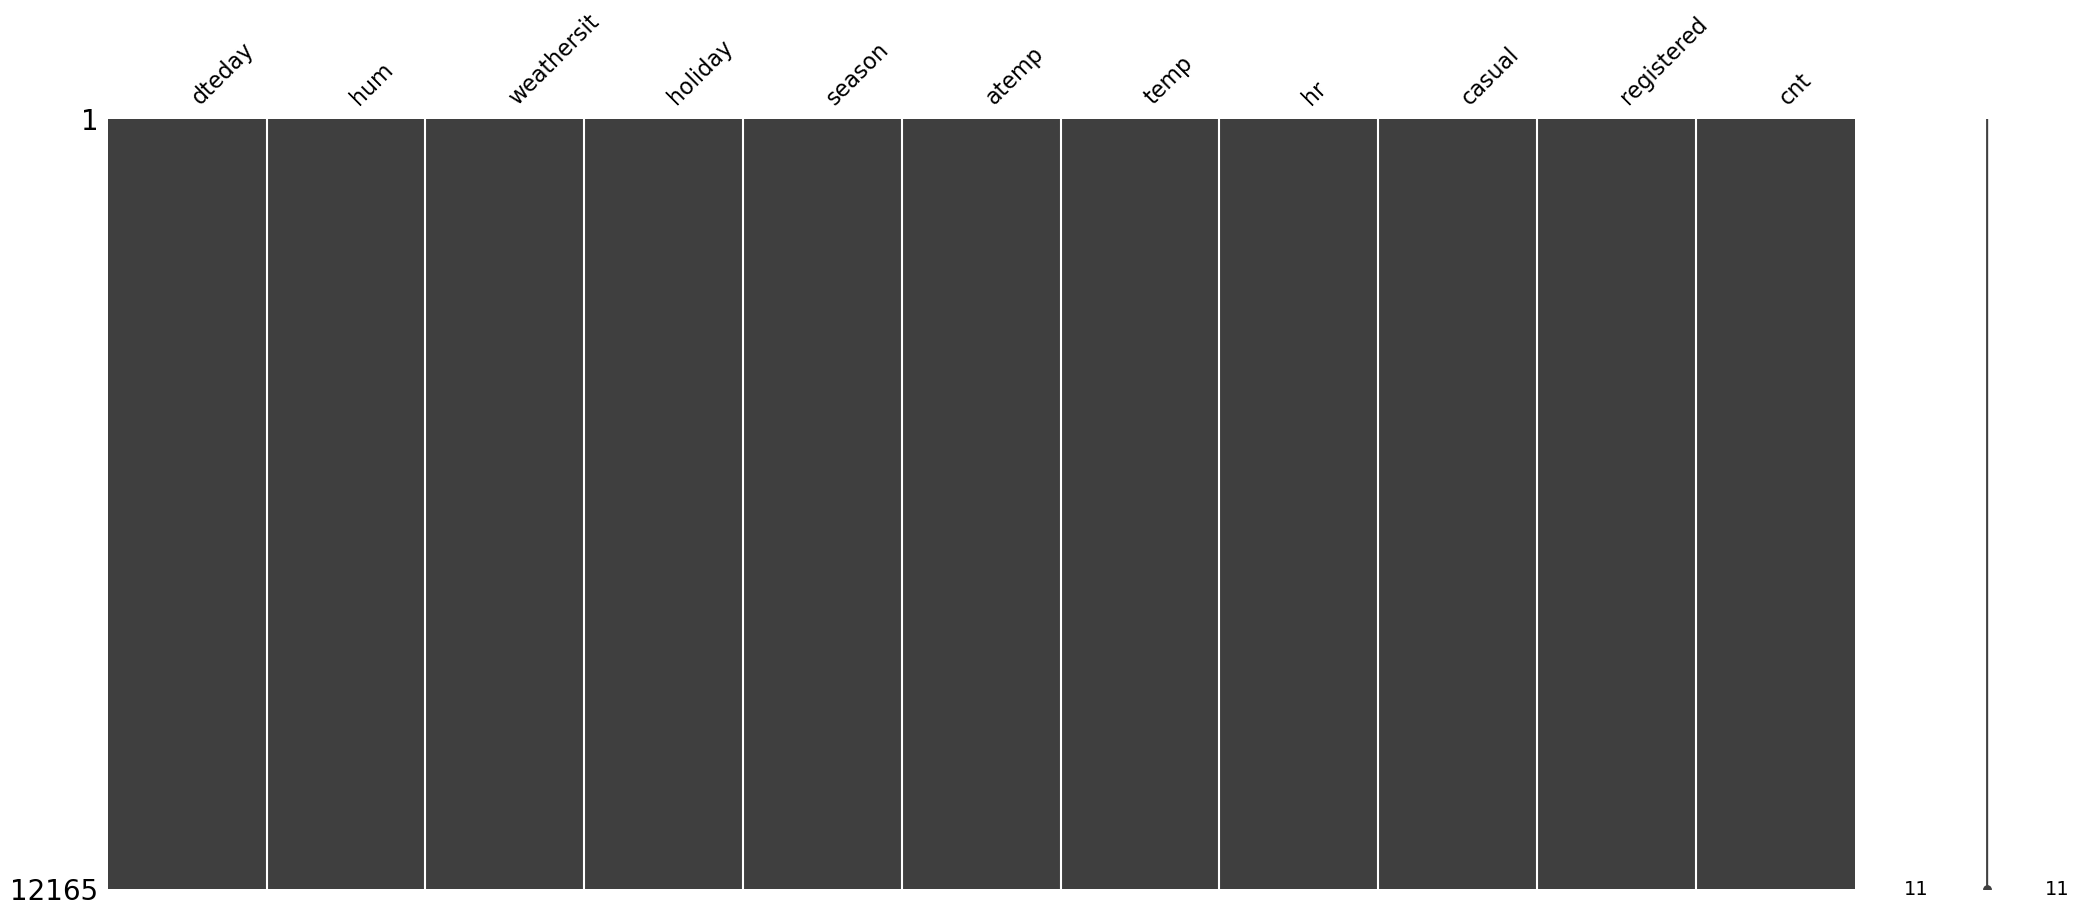

In [3]:
msno.matrix(df)

In [4]:
df.isnull().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

As we can see there is no occurence of missing value, so there will be no more treatment regarding missing value in this dataset

In [5]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


### Correlation 

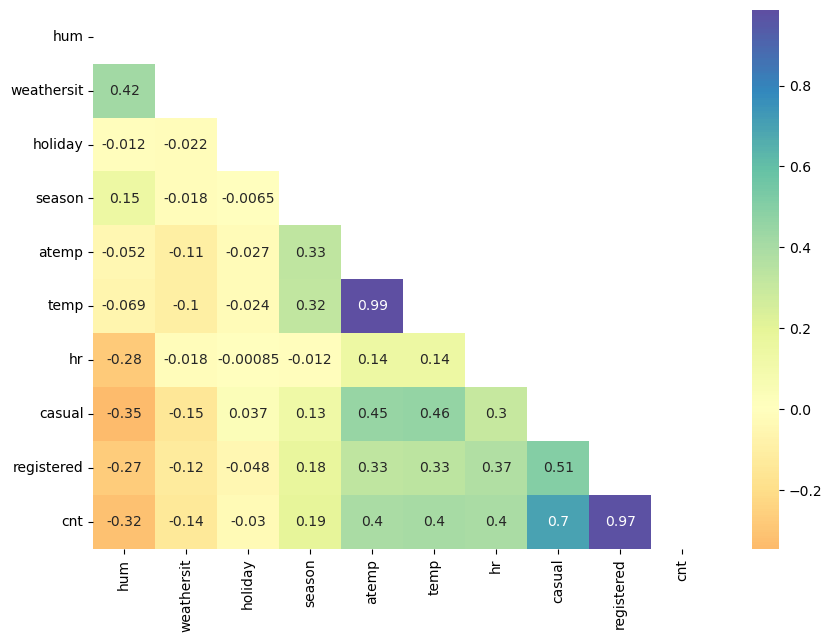

In [7]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(10,7))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

Based on the heatmap correlation of Pearson method, it can be seen that there is no notable correlation of each dataset's features, except the correlation of features that related to each other such `temp` and `atemp` as well as `registered` and `cnt`

### Outlier Detection 

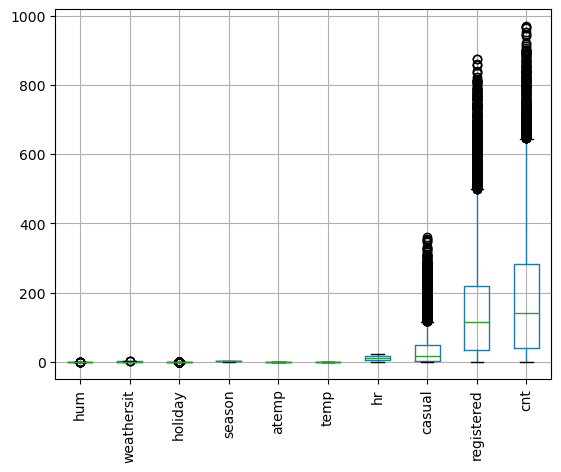

In [8]:
df.boxplot(rot=90);

Because in this project we need to predict the number of affordable bicycles to be provided by the company, therefore outlier detection is necessary for the `cnt`, as it represents as the target. Outliers in features `casual` and `registered` can be ignored, because there is already `cnt` represents the sum of the two features.

In [9]:
df['cnt'] = df['cnt'].apply(np.int64)

q1 = df['cnt'].describe()['25%']
q3 = df['cnt'].describe()['75%']

iqr = q3 - q1
print(f'IQR:',iqr)
print(f'Q1:',q1)
print(f'Q3:',q3)

IQR: 242.0
Q1: 40.0
Q3: 282.0


The Q1,interquartile, and Q3 of the `cnt` target are 41, 242, and 282. After that the number of outlier of the `cnt` target can be identified as follows:

In [10]:
#Calculate outlier value in the cnt Column
lower_limit = int(q1 - (1.5 * iqr))
upper_limit = int(q3 + (1.5 * iqr))

outlier = df[(df['cnt'] < lower_limit) | (df['cnt'] > upper_limit)][['cnt']]
len (outlier)

338

We found there are 338 outliers in the `cnt` target

In [11]:
print(f'Lower Limit:',lower_limit)
print(f'Upper Limit:',upper_limit)

Lower Limit: -323
Upper Limit: 645


<Axes: xlabel='cnt', ylabel='Density'>

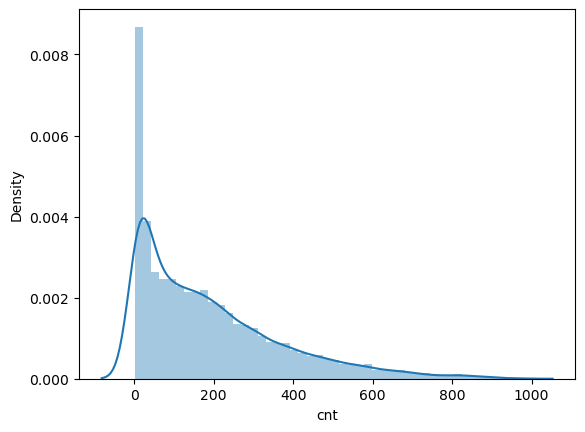

In [12]:
sns.distplot(df['cnt'])

Based on the histogram plot for the data distribution of `cnt`, it can be seen relatively that the feature have a positive skew data distribution. In addition, we take a quantitative approach to evaluate the normality test. We used a normality test using the D'Agostino and Pearson tests. The null hypothesis of the normality test is that the data follows a normal distribution. If the p-value of the test is less than the significance level (0.05), then the null hypothesis is rejected, indicating that the data does not follow a normal distribution. 

In [13]:
dp_statistics, df_pvalue = normaltest(df['cnt'])

if df_pvalue > 0.05:
    print(f'P-value: {df_pvalue}. So, we assume a normal distribution')
else:
    print(f'P-value: {df_pvalue}. So, we do not assume a normal distribution')

P-value: 0.0. So, we do not assume a normal distribution


Due to the result of normality test showed the p-value below 0.05, therefore the central tendency we use is median

In [14]:
df['cnt'].median()

142.0

In [15]:
df['cnt'].describe()

count    12165.000000
mean       189.271023
std        181.223903
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: cnt, dtype: float64

The results of the normality test using the D'Agostino and Pearson tests show that the test data from `cnt` target has a very small p-value and is below 0.05, indicating that `cnt` target does not have a normal distribution. Since they do not have normally distributed data, the central tendency we use is the median of the data.

It can be seen that 75% of the data (Q3) in the `cnt` shows the number of bicycles borrowed is less than 282, while the maximum value is 970. The distribution plot shows positive skewness. From the outliers detection, there are 338 data whose number of rent bikes is greater than 645 (upper limit based on IQR method). Therefore, the data that has the number of rent bikes above 645 will be filtered and will not be included in the machine learning regression modeling, so the skewness will be reduced. This will certainly be a limitation for the model that will be built later. 

<Axes: xlabel='cnt', ylabel='Density'>

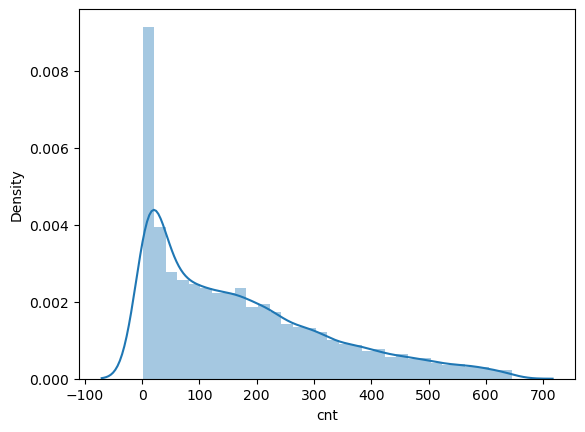

In [16]:
# Filtering of cnt column
df = df[(df['cnt'] <= 645)]
sns.distplot(df['cnt'])

In [17]:
df['cnt'].describe()

count    11827.000000
mean       173.211634
std        155.922696
min          1.000000
25%         37.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: cnt, dtype: float64

In [18]:
df['cnt'].median()

136.0

After filtering the median value of the number of bicycles borrowed by customers is 136.

### Feature Engineering 

Feature engineering is provided for category-kind of data such as `season`, `weathersit`, and `holiday`. This is done to replace the number code with the actual information to make it more representative

In [19]:
# create a dictionary mapping the integer values to season names
season_dict = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}

# replace the values in the 'season' column
df['season'] = df['season'].replace(season_dict)

In [20]:
df['season'].unique()

array(['fall', 'spring', 'summer', 'winter'], dtype=object)

In [21]:
# create a dictionary mapping the integer values to weather situation
weathersit_dict = {1: 'clear', 2: 'cloudy', 3: 'light rain', 4: 'heavy rain'}

# replace the values in the 'season' column
df['weathersit'] = df['weathersit'].replace(weathersit_dict)

In [22]:
df['weathersit'].unique()

array(['clear', 'cloudy', 'light rain', 'heavy rain'], dtype=object)

In [23]:
# create a dictionary mapping the integer values to season names
holiday_dict = {0: 'no', 1: 'yes'}

# replace the values in the 'season' column
df['holiday'] = df['holiday'].replace(holiday_dict)

In [24]:
df['holiday'].unique()

array(['no', 'yes'], dtype=object)

Treatment is carried out for the `dteday` data. This was performed to extract information about bicycle rentals based on years, months, and days.

In [26]:
df.dteday = pd.to_datetime(df.dteday)

In [27]:
df['year'] = df.dteday.dt.year
df['month'] = df.dteday.dt.month
df['day'] = df.dteday.dt.day

In [28]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day
0,2011-12-09,0.62,clear,no,fall,0.3485,0.36,16,24,226,250,2011,12,9
1,2012-06-17,0.64,clear,no,spring,0.5152,0.54,4,2,16,18,2012,6,17
2,2011-06-15,0.53,clear,no,spring,0.6212,0.62,23,17,90,107,2011,6,15
3,2012-03-31,0.87,cloudy,no,spring,0.3485,0.36,8,19,126,145,2012,3,31
5,2012-10-01,0.72,clear,no,fall,0.4545,0.46,0,6,39,45,2012,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,clear,no,winter,0.2273,0.24,7,14,243,257,2012,1,25
12161,2012-07-06,0.62,clear,no,summer,0.7424,0.78,0,39,63,102,2012,7,6
12162,2012-02-20,0.60,cloudy,yes,winter,0.2121,0.24,5,0,6,6,2012,2,20
12163,2012-03-31,0.77,cloudy,no,spring,0.4242,0.42,2,14,55,69,2012,3,31


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11827 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      11827 non-null  datetime64[ns]
 1   hum         11827 non-null  float64       
 2   weathersit  11827 non-null  object        
 3   holiday     11827 non-null  object        
 4   season      11827 non-null  object        
 5   atemp       11827 non-null  float64       
 6   temp        11827 non-null  float64       
 7   hr          11827 non-null  int64         
 8   casual      11827 non-null  int64         
 9   registered  11827 non-null  int64         
 10  cnt         11827 non-null  int64         
 11  year        11827 non-null  int64         
 12  month       11827 non-null  int64         
 13  day         11827 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 1.4+ MB


In [30]:
df['month'] = df['month'].astype('int64')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11827 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      11827 non-null  datetime64[ns]
 1   hum         11827 non-null  float64       
 2   weathersit  11827 non-null  object        
 3   holiday     11827 non-null  object        
 4   season      11827 non-null  object        
 5   atemp       11827 non-null  float64       
 6   temp        11827 non-null  float64       
 7   hr          11827 non-null  int64         
 8   casual      11827 non-null  int64         
 9   registered  11827 non-null  int64         
 10  cnt         11827 non-null  int64         
 11  year        11827 non-null  int64         
 12  month       11827 non-null  int64         
 13  day         11827 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 1.4+ MB


### Data Analytics

In [32]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt', 'year', 'month', 'day'],
      dtype='object')

In [33]:
df.describe()

,hum,atemp,temp,hr,casual,registered,cnt,year,month,day
count,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000
mean,0.628451,0.473414,0.494223,11.438573,33.669147,139.542488,173.211634,2011.487782,6.483385,15.642259
std,0.191904,0.171895,0.192464,6.978877,46.178321,126.738135,155.922696,0.499872,3.455761,8.803833
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000
25%,0.480000,0.333300,0.340000,5.000000,4.000000,32.000000,37.000000,2011.000000,3.000000,8.000000
50%,0.630000,0.484800,0.500000,11.000000,16.000000,111.000000,136.000000,2011.000000,6.000000,16.000000
75%,0.790000,0.621200,0.660000,18.000000,46.000000,208.000000,267.000000,2012.000000,9.000000,23.000000
max,1.000000,1.000000,1.000000,23.000000,354.000000,629.000000,645.000000,2012.000000,12.000000,31.000000


In [34]:
df.describe(include=['O'])

,weathersit,holiday,season
count,11827,11827,11827
unique,4,2,4
top,clear,no,summer
freq,7802,11466,3043


In [35]:
categoric_df = df.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,weathersit,4,"[clear, cloudy, light rain, heavy rain]"
1,holiday,2,"[no, yes]"
2,season,4,"[fall, spring, summer, winter]"


__Observation:__  
* The most bicycles borrowed on a casual basis was 354 pieces. 
* The most bicycles borrowed by registered customers was recorded at 629 pieces.
* The most bicycles borrowed on a casual and registered basis was at least 645 pieces. 
* Based on the data, the most frequent time bicycles are borrowed is during the summer.
* The most bicycles were borrowed during sunny weather (clear)
* Also, bicycles are most frequently borrowed when customers are not on vacation.

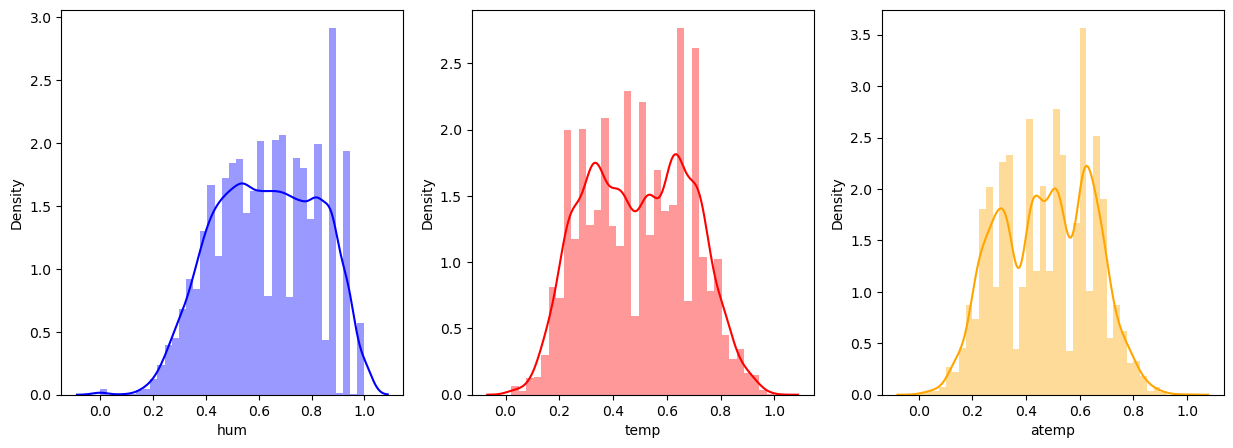

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.distplot(df['hum'], color='blue', ax=axs[0])
sns.distplot(df['temp'], color='red', ax=axs[1])
sns.distplot(df['atemp'], color='orange', ax=axs[2])

plt.show()

In the three histogram plots above, it can be seen that the characteristics of the distribution of normalized humidity data have a left-skewed pattern with a relatively wide peak. The characteristics of normalized temperature have data distribution that shows bimodal distribution, while normalized feeling temperature is characterized by trimodal distribution.

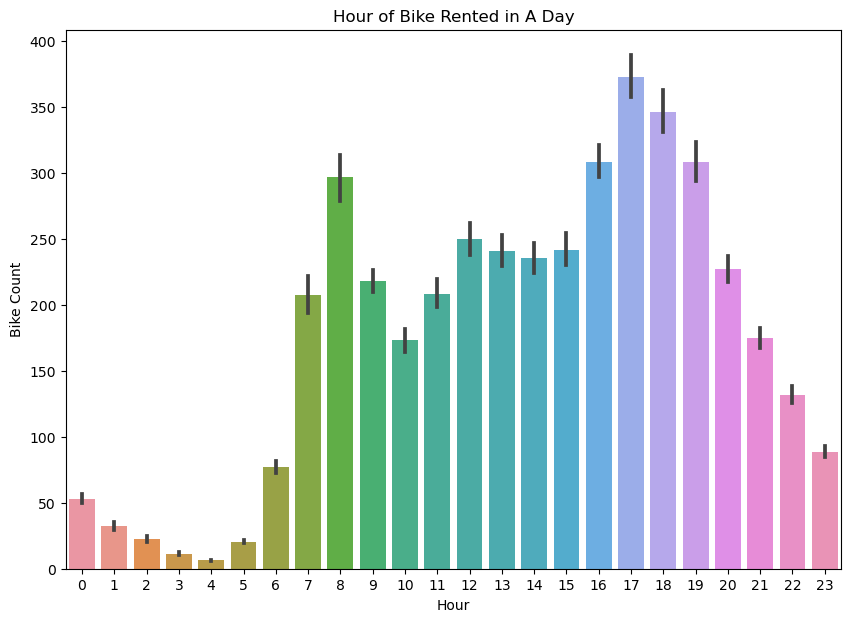

In [37]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'hr', y = 'cnt', data = df)
plt.title('Hour of Bike Rented in A Day')
plt.xlabel('Hour')
plt.ylabel('Bike Count')
plt.show()

Based on the barplot of bicycle loans by hour, it can be seen that the most bicycles are borrowed by customers at 17.00 and at 08.00 in second place. Based on the rental hours, customers rent bicycles for commuting to and from work, or perhaps for sports needs.

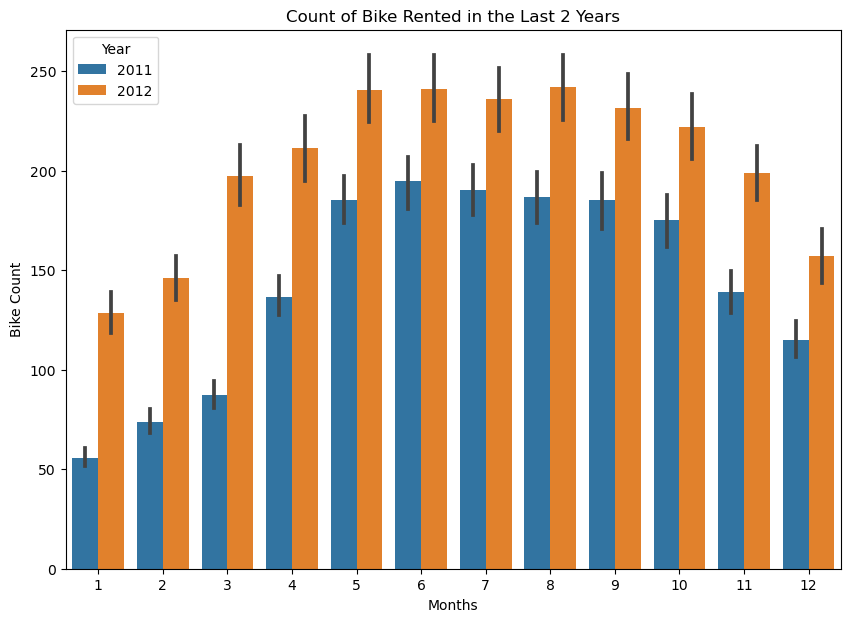

In [38]:
plt.figure(figsize=(10, 7))
sns.barplot(x='month', y='cnt', hue='year', data=df)
plt.title('Count of Bike Rented in the Last 2 Years')
plt.xlabel('Months')
plt.ylabel('Bike Count')
plt.legend(title='Year', loc='upper left')
plt.show()


Based on the barplot of bicycle rentals over year, it can generally be seen that the most bicycles were borrowed during the second year, during months 3rd - 8th. The most bicycles were borrowed in the second year during the 8th month and the least in the first year during the month 1st. In the first year, although the first month saw the fewest bicycles borrowed, there was an increase in bicycle borrowing until month 6th. There was also a gradual decrease in the number of bicycles borrowed in the first year from month 7th to 12th before increasing significantly in the second year from month 1st to month 6th.

The rising trend of bicycle rentals in the second year indicates customer fulfillment in renting a bicycle, so they may invite their colleagues to rent a bicycle. The decline at the end of the year could be due to customers going on vacation for Christmas and New Year, and perhaps also because it has entered winter.


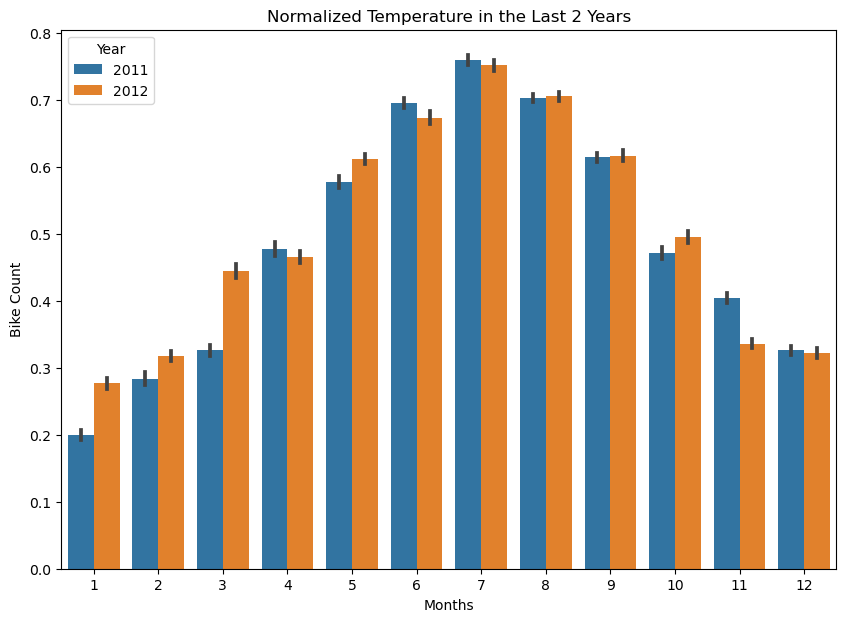

In [39]:
plt.figure(figsize=(10, 7))
sns.barplot(x='month', y='temp', hue='year', data=df)
plt.title('Normalized Temperature in the Last 2 Years')
plt.xlabel('Months')
plt.ylabel('Bike Count')
plt.legend(title='Year', loc='upper left')
plt.show()

Based on the barplot of normalized temperature over months, it can be seen that the highest normalized temperature values in the 7th month each year. The normalized temperature value is above the value of 0.5 from the 5th to the 9th month each year. This is in line with the arrival of summer time which causes the temperature to increase during the season.

holiday,no,yes
season,,
fall,149.0,110.5
spring,158.0,157.0
summer,189.0,245.5
winter,76.0,46.5


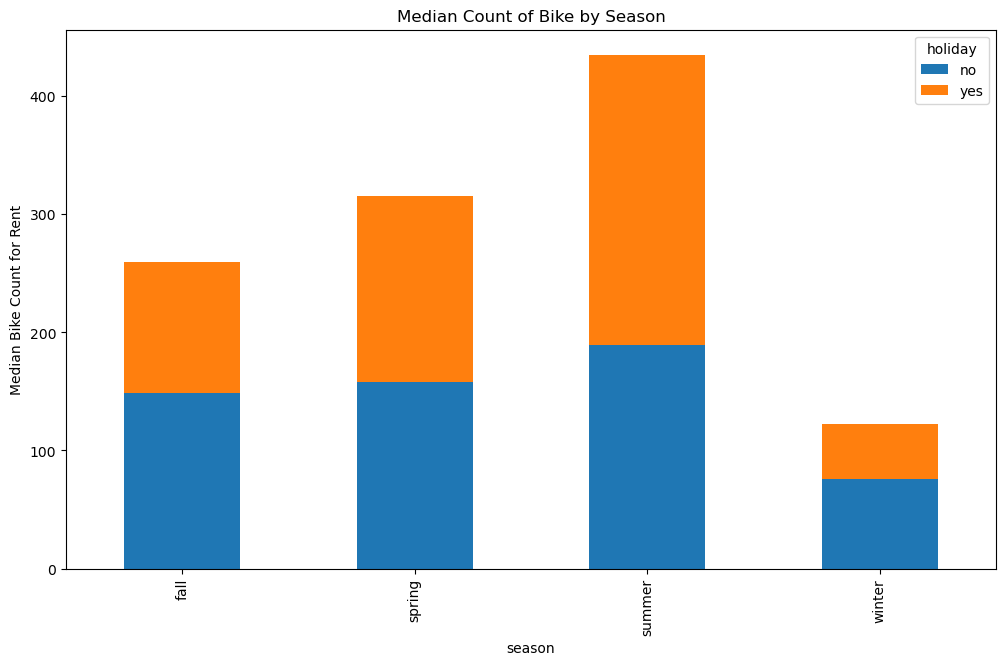

In [40]:
season_pivot = df.pivot_table(index='season', columns='holiday', values='cnt', aggfunc='median')
display(season_pivot)

pivot_plot = season_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('season')
pivot_plot.set_ylabel('Median Bike Count for Rent')
pivot_plot.set_title('Median Count of Bike by Season');

From the cross tabulation results, it can be seen that the most number of bicycles rented is in the summer, whether on holiday or not. Meanwhile, the least number of bicycles were borrowed in winter. This makes sense because people tend not to use bicycles in winter due to low temperatures and to avoid the risk of illness or accidents due to slippery roads caused by rain or snow.

## Machine Learning Preprocessing 

In [41]:
df_model = df.drop(columns=['dteday', 'casual', 'registered'], axis=1)
df_model 

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,year,month,day
0,0.62,clear,no,fall,0.3485,0.36,16,250,2011,12,9
1,0.64,clear,no,spring,0.5152,0.54,4,18,2012,6,17
2,0.53,clear,no,spring,0.6212,0.62,23,107,2011,6,15
3,0.87,cloudy,no,spring,0.3485,0.36,8,145,2012,3,31
5,0.72,clear,no,fall,0.4545,0.46,0,45,2012,10,1
...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,clear,no,winter,0.2273,0.24,7,257,2012,1,25
12161,0.62,clear,no,summer,0.7424,0.78,0,102,2012,7,6
12162,0.60,cloudy,yes,winter,0.2121,0.24,5,6,2012,2,20
12163,0.77,cloudy,no,spring,0.4242,0.42,2,69,2012,3,31


In [42]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11827 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         11827 non-null  float64
 1   weathersit  11827 non-null  object 
 2   holiday     11827 non-null  object 
 3   season      11827 non-null  object 
 4   atemp       11827 non-null  float64
 5   temp        11827 non-null  float64
 6   hr          11827 non-null  int64  
 7   cnt         11827 non-null  int64  
 8   year        11827 non-null  int64  
 9   month       11827 non-null  int64  
 10  day         11827 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


### Transformation 

#### Encoding 

Encoding is the process of converting categorical data into a numerical format that can be used by machine learning algorithms. This is necessary because most machine learning algorithms work with numerical data. There three different encoding techniques are used, those are one-hot encoding, ordinal encoding, and binary encoding.

For data that has information such as yes/no like in the `holiday` feature, one hot encoding will be applied, while for categorical data types with stratification such as `weathersit` ordinal encoding will be utilized. In the case of `season`, since there is no significant ordinal relationship between season, one hot encoding can be a better choice. 

In [43]:
weathersit_ordered = [['clear', 'cloudy', 'light rain', 'heavy rain']]

categoric_df = df_model.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,weathersit,4,"[clear, cloudy, light rain, heavy rain]"
1,holiday,2,"[no, yes]"
2,season,4,"[fall, spring, summer, winter]"


In [44]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['holiday', 'season']),
    ('Ordinal Encoding', OrdinalEncoder(categories=weathersit_ordered), ['weathersit'])], remainder='passthrough')

In [45]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['holiday', 'season']),
                                ('Ordinal Encoding',
                                 OrdinalEncoder(categories=[['clear', 'cloudy',
                                                             'light rain',
                                                             'heavy rain']]),
                                 ['weathersit'])])

#### Scaling

Since features such as `hum`, `temp`, and `atemp` in the raw data have been normalized, and since features such as `year`, `month`, and `day` have been represented at a reasonable scale, therefore there is no need for further scaling.

## Data Splitting 

In this process, the dataset is split into training and test sets. The training set is used to train the model, and the test set is separated to evaluate the final model. We use training data that has not been transformed because the transformation will be done in the pipeline.

In [46]:
x = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

In [47]:
# Splitting data training dan test dengan proporsi 70:30
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,  
    test_size=0.3,
    random_state=1)

# Machine Learning Method

### Model Benchmarking 

There are several machine learning modelling methods for regression such as linear regression, Support Vector Regression (SVR), K-Nearest Neighbors (KNN), decision tree, random forest, and extreme gradient boosting (XGBoost), also we add two regularization techniques such lasso and ridge to be compared as well. The purpose of using those models are in need to predict the optimum number bike of rent that should be provided by the company.

In Python, the TransformedTargetRegressor is a wrapper or meta-estimator provided by scikit-learn. It is used for applying a transformation to the target variable (dependent variable) before fitting a regression model, and then inversely transforming the predicted values back to the original scale. This can be useful in situations where the target variable does not follow a normal distribution or has heteroscedasticity, and applying a transformation can improve the model's performance.

In [48]:
# Defining Model
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# modeling is performed by logaritmic function and returned by the exponential function  
lr_log = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
lasso_log = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
ridge_log = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
svr_log = TransformedTargetRegressor(svr, func=np.log, inverse_func=np.exp)
knn_log = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
dt_log = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
rf_log = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
xgb_log = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# model candidates
models = [lr_log, lasso_log, ridge_log, svr_log, knn_log, dt_log, rf_log, xgb_log]

In this phase the dataset is divided into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used once for testing. By using cross-validation, we can get a better estimate of the model's performance. As we work on regression machine learning modelling, the used performance metric evaluation are RMSE, MAE, MAPE, and they will be averaged across the k folds.

The reason of using negative root mean squared error for the scoring due to the cross-validation function assumes that higher scores indicate better performance, but in the case of RMSE, MAE, and MAPE, lower values indicate better performance. Note: The scoring used is negative RMSE, MAE, and MAPE, so the model chosen is the one with the largest value metrics or close to 0.

In [49]:
# metrics
rmse_score = []
rmse_mean = []
rmse_std = []

mae_score = []
mae_mean = []
mae_std = []

mape_score = []
mape_mean = []
mape_std = []

# determine the best metrics in models
for i in models:
    cross_val = KFold(n_splits=5, shuffle=True, random_state=1)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_rmse_cv = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=cross_val, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )

    print(model_rmse_cv, i)

    rmse_score.append(model_rmse_cv)
    rmse_mean.append(model_rmse_cv.mean())
    rmse_std.append(model_rmse_cv.std())

    # MAE
    model_mae_cv = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=cross_val, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )

    print(model_mae_cv, i)

    mae_score.append(model_mae_cv)
    mae_mean.append(model_mae_cv.mean())
    mae_std.append(model_mae_cv.std())

    # MAPE
    model_mape_cv = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=cross_val, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )

    print(model_mape_cv, i)

    mape_score.append(model_mape_cv)
    mape_mean.append(model_mape_cv.mean())
    mape_std.append(model_mape_cv.std())


[-146.66868272 -144.93069656 -137.24977355 -141.05093035 -140.94862552] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-100.38360352  -98.43865953  -93.62706017  -95.07368327  -95.94442589] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.34910702 -1.38324698 -1.38464065 -1.33585079 -1.41537333] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-170.00601788 -170.29700936 -162.40910826 -157.34456165 -165.33602418] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())
[-121.66389962 -120.55552238 -114.54624394 -111.76293633 -117.38520182] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())
[-2.03533186

[-0.51288393 -0.56466078 -0.56843689 -0.54921282 -0.5568434 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                                  importance_

### Model Selection

In [50]:
models_train = pd.DataFrame({
    'Model': ['Linear Regression','Lasso Regression','Ridge Regression', 'Support Vector Regression','KNN Regressor', 'DT Regressor','RandomForest Regressor', 'XGBoost Regressor'],
    'RMSE Mean': rmse_mean,
    'RMSE std': rmse_std,
    'MAE Mean': mae_mean,
    'MAE std': mae_std,
    'MAPE Mean': mape_mean,
    'MAPE std': mape_std
})

models_train

,Model,RMSE Mean,RMSE std,MAE Mean,MAE std,MAPE Mean,MAPE std
0,Linear Regression,-142.169742,3.310960,-96.693486,2.418695,-1.373644,0.028231
1,Lasso Regression,-165.078544,4.868656,-117.182761,3.683010,-2.015065,0.089017
2,Ridge Regression,-142.146135,3.330233,-96.709303,2.442481,-1.374313,0.028306
3,Support Vector Regression,-158.190746,5.018461,-120.408400,3.345890,-4.956108,0.210566
4,KNN Regressor,-92.085636,1.431925,-59.730238,0.737060,-0.643722,0.025885
5,DT Regressor,-106.348040,1.108370,-65.095356,0.928016,-0.834940,0.043176
6,RandomForest Regressor,-80.220862,1.190253,-51.516774,0.685617,-0.577490,0.018145
7,XGBoost Regressor,-79.268639,0.650076,-51.244687,0.477927,-0.550408,0.019895


From the table above, it can be seen that the lowest average value of RMSE, MAE, and MAPE is in the XGBoost Regressor model followed by the Random Forest model in second place. Then, trials using test data will be carried out on the two candidate models.

In [51]:
model_cand = {
    'XGB Test Before Tuning': XGBRegressor(random_state=1),
    'Random Forest Test Before Tuning': RandomForestRegressor(random_state=1)
}

rmse_score = []
mae_score = []
mape_score = []

for i in model_cand:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', model_cand[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_score.append(mean_absolute_error(y_test, y_pred))
    mape_score.append(mean_absolute_percentage_error(y_test, y_pred))

testing_score_before_tuning = pd.DataFrame({'RMSE': rmse_score, 'MAE': mae_score, 'MAPE': mape_score}, index=model_cand.keys())
testing_score_before_tuning

,RMSE,MAE,MAPE
XGB Test Before Tuning,73.636664,50.962930,0.906392
Random Forest Test Before Tuning,72.977032,49.357974,0.781700


The results of the RMSE, MAE, and MAPE scores from trials using test data on two candidate models are not much different from the results obtained using train data, indicating that both models are quite stable. The RMSE, MAE, and MAPE values of the Random Forest model is lower compared to XGBoost, indicates the Random Forest model is more accurate in predicting the test data. Therefore, the Random Forest model is chosen for model optimization through hyperparameter tuning process.

### Hyperparameter Tuning

In [52]:
pipe_rf = Pipeline([('preprocessing', transformer),('rf', RandomForestRegressor(random_state=1))])

In [53]:
from scipy.stats import randint

max_depth = [10, 20, 30, None] #max number of levels in each decision tree
n_estimators = randint(100, 201) #number of trees in the forest
max_features = ['auto', 'sqrt'] #max number of features considered for splitting a node
min_samples_split = randint(2, 11) #min number of data points placed in a node before the node is split
min_samples_leaf = randint(1, 5) #min number of data points allowed in a leaf node
bootstrap = [True, False] #method for sampling data points (with or without replacement)

# Hyperparam space RandomForest
param_dist = {
    'rf__max_depth': max_depth, 
    'rf__n_estimators': n_estimators,
    'rf__max_features': max_features,
    'rf__min_samples_split': min_samples_split,
    'rf__min_samples_leaf': min_samples_leaf,
    'rf__bootstrap': bootstrap
}

In [54]:
scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

In [55]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In the hyperparameter tuning stage, the best parameters for the Random Forest model are searched using randomized search methods. RandomizedSearchCV is a faster approach for hyperparameter tuning because it samples a subset of hyperparameters from a specified distribution, whereas GridSearchCV tries every combination of hyperparameters in the parameter grid. 

In [56]:
# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions = param_dist,
    n_iter = 50,
    cv = kfold, 
    scoring = scoring, 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1  
)

In [57]:
random_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['holiday',
                                                                                'season']),
                                                                              ('Ordinal '
                                                                               'Encoding',
                                                                               OrdinalEncoder(categories=[['clear',
                                                                                                           'cloudy',
                                                                                                           'light '
                                                                                                           'rain',
                                                                                                           'heavy '
                                                                                                           'rain']]),
                                                                               ['weathersit'])])),
                                             ('rf'...
                                        'rf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002961A9DBA90>,
                                        'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002961C6736A0>},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [58]:
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Best_score: -77.98747408786302
Best_params: {'rf__bootstrap': True, 'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 186}


#### After Tuning Using Test Dataset

In [59]:
model = {'Random Forest Test After Tuning': RandomForestRegressor(random_state=1)}
rf_tuning = random_rf.best_estimator_
rf_tuning.fit(x_train, y_train)
y_pred_rf_tuning = rf_tuning.predict(x_test)

rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

testing_score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())

#### Comparison

In [60]:
pd.DataFrame(testing_score_before_tuning.loc['Random Forest Test Before Tuning']).T

,RMSE,MAE,MAPE
Random Forest Test Before Tuning,72.977032,49.357974,0.7817


In [61]:
testing_score_after_tuning

,RMSE,MAE,MAPE
Random Forest Test After Tuning,73.28941,49.812198,0.767854


It turns out that model optimization through hyperparameter tuning does not cause the RMSE and MAE metrics to decrease, meaning that the tuning model results are not that accurate compared to the model before tuning despite a slight decline in the MAPE metric, so the model that will be selected is the model before tuning.

### Selected Model

In [62]:
# Define the model candidates
model_cand = {
    'Random Forest Test Before Tuning': RandomForestRegressor(random_state=1)
}

# Fit and evaluate each model
model_rf = list(model_cand.keys())
pipeline_models = [Pipeline([
    ('preprocessing', transformer),
    ('model', model)
]).fit(x_train, y_train) for model in model_cand.values()]

y_preds = [model.predict(x_test) for model in pipeline_models]

rmse_score = [np.sqrt(mean_squared_error(y_test, y_pred)) for y_pred in y_preds]
mae_score = [mean_absolute_error(y_test, y_pred) for y_pred in y_preds]
mape_score = [mean_absolute_percentage_error(y_test, y_pred) for y_pred in y_preds]

testing_score_best_model = pd.DataFrame({'Model': model_rf, 'RMSE': rmse_score, 'MAE': mae_score, 'MAPE': mape_score})
testing_score_best_model.set_index('Model', inplace=True)
testing_score_best_model


,RMSE,MAE,MAPE
Model,,,
Random Forest Test Before Tuning,72.977032,49.357974,0.7817


#### Feature Importances

In [63]:
x_train_preprocess1 = transformer.fit_transform(x_train)
x_test_preprocess1 = transformer.transform(x_test)

In [64]:
x_train_preprocess1 = pd.DataFrame(x_train_preprocess1)
x_test_preprocess1 = pd.DataFrame(x_test_preprocess1)

In [65]:
transformer.transformers_

[('One Hot', OneHotEncoder(drop='first'), ['holiday', 'season']),
 ('Ordinal Encoding',
  OrdinalEncoder(categories=[['clear', 'cloudy', 'light rain', 'heavy rain']]),
  ['weathersit']),
 ('remainder', 'passthrough', [0, 4, 5, 6, 7, 8, 9])]

In [66]:
# Feature names from OneHotEncoder
one_hot_encoder = transformer.named_transformers_['One Hot']
one_hot_feature_names = one_hot_encoder.get_feature_names_out(['holiday', 'season']).tolist()

# Feature names from OrdinalEncoder
ordinal_encoder = transformer.named_transformers_['Ordinal Encoding']
ordinal_feature_names = ordinal_encoder.get_feature_names_out(['weathersit']).tolist()

# Concatenate all feature names
feature_names = one_hot_feature_names + ordinal_feature_names + ['atemp', 'temp', 'hum', 'hr', 'year','month','day']

In [67]:
x_train_preprocess1.shape

(8278, 12)

In [68]:
len(feature_names)

12

In [69]:
x_train_preprocess1.columns = feature_names
x_test_preprocess1.columns = feature_names

In [70]:
rf = RandomForestRegressor(random_state=1)
rf.fit(x_train_preprocess1,y_train)
y_pred = rf.predict(x_test_preprocess1)

In [71]:
feature_importances = rf.feature_importances_

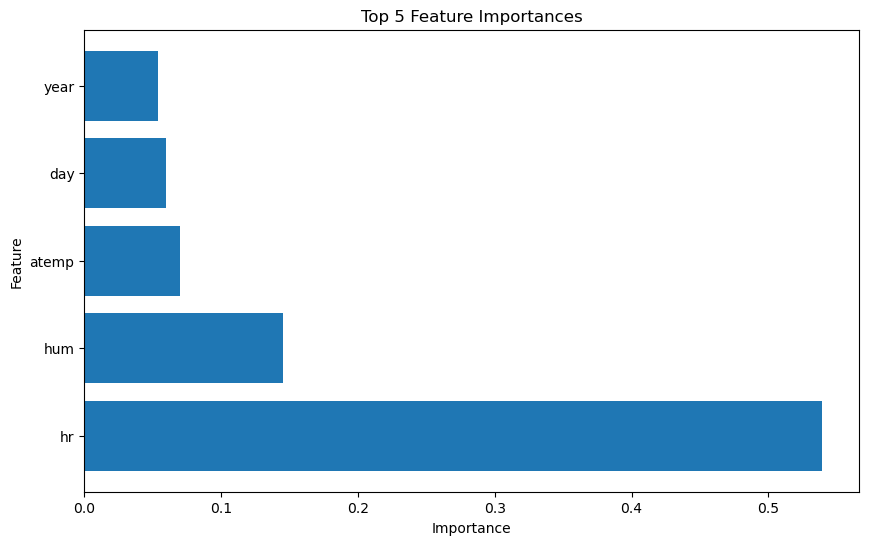

In [72]:
# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the top n feature importances
n = 5  # Number of top features to display
top_features_df = feature_importances_df.head(n)

plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Feature Importances')
plt.show()

Based on the modeling that has been done, the `hr` feature is the most influential feature on the customer's tendency to borrow a bike. This means that customers consider what time of the day to rent a bicycle, be it to go to or from school or work, or for sports and recreational needs. In the second and third place, it turns out that the number of bicycle rentals is influenced by the humidity level and the feeling temperature in Celsius.

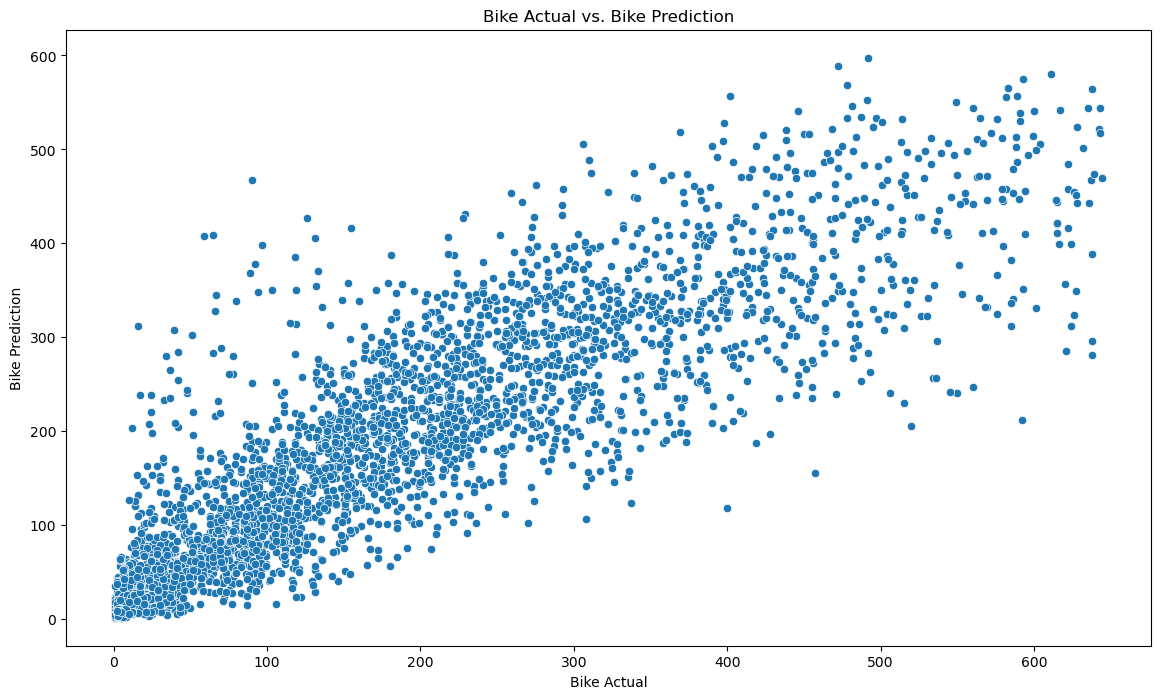

In [73]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Bike Actual vs. Bike Prediction', xlabel='Bike Actual', ylabel='Bike Prediction');

The scatter plot of bike actual versus bike prediction shows a positive correlation relationship. However, the predictions are still prone to overestimation and underestimation in some cases. An example of overestimation for the actual value of the number of bikes rented around 200 and below but still predicted to be many more. As for the example of underestimation, where the actual value of the number of bicycles rented around 600 and below but still predicted to be less. The relatively small MAPE value indicates that the model is still reliable.

# Business Implementation

Apart from parameterizing the performance of machine learning models, one can extract information from the metrics for business purposes. In terms of business implementation, by taking into account the RMSE metric as it is sensitive to outliers, company shall add more 73 bikes as an anticipation to keep sufficient bicycles available for customers. For instance, the total number of bicycles borrowed by the customer is 27, the prediction result may deviate up to 100 pieces if considering the value of RMSE. Adding 73 bicycles considering the error from the RMSE rather than adding 49 bicycles from the MAE information, is a relevant strategy because it prevents deficiencies in the event of a surge in the number of bicycles borrowed.

Based on the results of the regression machine learning model metrics, we can conclude that if we later use this model to make predictions in increasing the number of bicycles in a certain period, let's say the price of bicycles that the company needs to provide per unit is 275€, so the company needs to allocate additional bicycle procurement funds of 275€ x 73 = 20,075€.

If indeed the company has an initial capital for procuring bicycles of 40,000€ and it turns out that the procurement needed is 20,075€, it means that the company has managed to save 19,925€ or managed to save 49% of operational funds for procuring bicycles.

# Conclusion and Recommendation

### Conclusion 

   1. According to median, the bicycle rentals are highest in summer and lowest in winter.

   2. The factor that most influences customers in renting bicycles is the time of day, followed by humidity and the feeling temperature. 
  
   3. The best machine learning model used was Random Forest Model, with a RMSE, MAE, and MAPE score is equal to 72.977032, 49.357974, and 0.7817 respectively.

   4. The selected model is still prone to overestimation and underestimation. However, the machine learning model is still reliable because it has a relatively small MAPE.

### Recommendation

- Hyperparameter tuning to optimize model by adding more variety of parameter values using gridsearch searching is desired, as smaller RMSE, MAE, and MAPE values may be obtained. 
 
- To increase the confidence in the Random Forest Model, one shall add features that may be useful such as location data, city, area, population density, or distance to popular places. 

- Company should allocate additional numbers of bike, can be 73 if it is guided by RMSE or 49 if it follows the reference from MAE. Adding 73 bikes to anticipate more bicycles being borrowed by customers is favorable in summer season and perhaps to reduce 73 bicycles allocation during winter.

- The company can allocate 20,075 € for the program to procure 73 bicycles if the price of one bicycle is 275 €.